In [123]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
from scipy import stats
from scipy.stats import norm 
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import cauchy
from numpy import random
import scipy.constants as const
from tabulate import tabulate
import math
from matplotlib import cm
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In this lab, we will practice different estimation methods to find the probability distribution function
(PDF) which best describes the mass distribution of dataset (Unit: GeV). The PDF function of interest is Cauchy distribution, also known as the Lorentz distribution or the (non-relativistic) Breit–
Wigner distribution (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.
stats.cauchy.html) There are 2 free parameters of the Lorentz distribution: mass and width.

The Lorentz distribution: <br>
\begin{equation}
f(m,\Gamma) = \frac{1}{\pi} \frac{\Gamma/2}{(m-m_0)^2+(\Gamma/2)^2}
\end{equation}

The Cauchy Distribution corresponds to parameter of $\Gamma=2$. The p.d.f. of cauchy is:<br>
\begin{equation}
f(x)=\frac{1}{\pi(1+x^2)}
\end{equation}
For the location parameter $a=0$, the characteristic function is 
\begin{equation}
\phi(t)=e^{|-t|}
\end{equation}
<br>
For the sample mean of N measurements, $\bar{x}=\sum^{N}_{1}\frac{x_i}{N}$ the characteristic function is 
\begin{equation}
\phi_{\bar{x}}(t)=(\phi(t/N))^N=\phi(t)
\end{equation}

The dataset is shown here:

In [144]:
# Copy in Data
mass = [7.95442531,10.60408232,9.9020277,10.42288788,17.2193401,10.06076572,10.00176003,
7.8289388,9.55481385,9.99981543,10.3156156,10.70547087,9.80374407,7.62085689,9.60747351,]
mass = np.asarray(mass)
print(mass.shape)

(15,)


# Task 1 Visualization
1. Draw the unbinned mass distribution (see below for an example of this type of plot).
2. Draw the binned distribution in 1D histogram. Set bin size 0.5 GeV betwen range 0 and 20GeV and show vertical error bar in each bin.


Text(0.5, 1.0, 'Unbinned Mass Distribution')

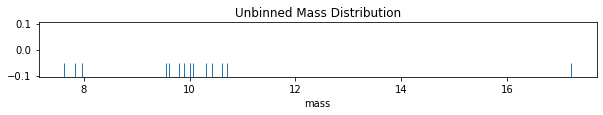

In [143]:
# Draw unbinned distribution using rugplot as in example
fig, ax = plt.subplots(figsize=(10,1))

sns.rugplot(mass, height=0.25)
ax.set_xlabel('mass')
ax.set_title('Unbinned Mass Distribution')

<ErrorbarContainer object of 3 artists>

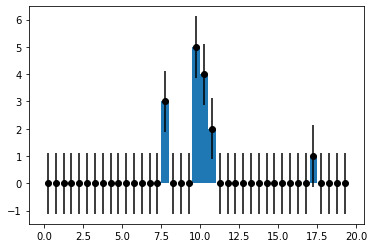

In [152]:
# Draw binned 1D histogram of mass distribution with vertical error bars
bins = np.arange(0, 20, 0.5) # Bin size 0.5 from 0 to 20 GeV
counts, bins, patches = plt.hist(mass, bins=bins)
bin_centers = (bins[:-1] + bins[1:]) / 2
errors = np.std(counts)
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', color='black')

# Task 2 Maximum Likelihood estimate (4 points)
Using maximum likelihood estimation method to find the probability distribution function.
1. Construct unbinned negative log-likelihood (NLL) function, i.e. −2 ln(𝐿)
2. Scan (𝑚, Γ) in fine step size and find the best estimate parameter (𝑚0, Γ0) which leads to
the minimum NLL, i.e. maximum Likelihood value, −2 ln(𝐿𝑚𝑎𝑥).
3. Plot NLL as function of parameters (mass, width)=(𝑚, Γ) as 2D contour. Choose appropriate
ranges of mass and width so that outer countour is around −2 ln(𝐿𝑚𝑎𝑥 + 5).
4. Plot mass distribution and superpose PDF with the best fit parameter (𝑚0, Γ0)
See example contour plots and fit output plot below (plots are just for illustration purpose).


Given a sample of N observations ${x_1,....,x_N}$, from a p.d.f. $f(x|\theta)$ with unknown parameter $\theta$, the likelihood and its log are: <br>
$L(\theta)=\Pi^N_{i=1}f(x|\theta)$ <br>
$lnL(\theta)=\sum^N_{i=1}lnf(x|\theta)$ <br>

In [115]:
# Write in NLL function
def NLL(x, m, g):
    x = np.asarray(x)
    N = len(x)
    b_shape = np.broadcast(m, g).shape # Broadcast to avoid loops
    x = x.reshape(x.shape + tuple([1 for s in b_shape])) # Store in tuple
    ll = (N - 1) * np.log(g) - np.sum(np.log((g ** 2) + ((x - m) ** 2)), 0) # nll
    return ll

In [116]:
# Find max likelihood value 
np.random.seed(36)
m_given = 0
g_given = 2

gamma_vals = np.linspace(0.1,10,150)
m_vals = np.linspace(-10,10,150)

x = cauchy(0, 2).rvs(15)



[2.29261745]
[-0.46979866]


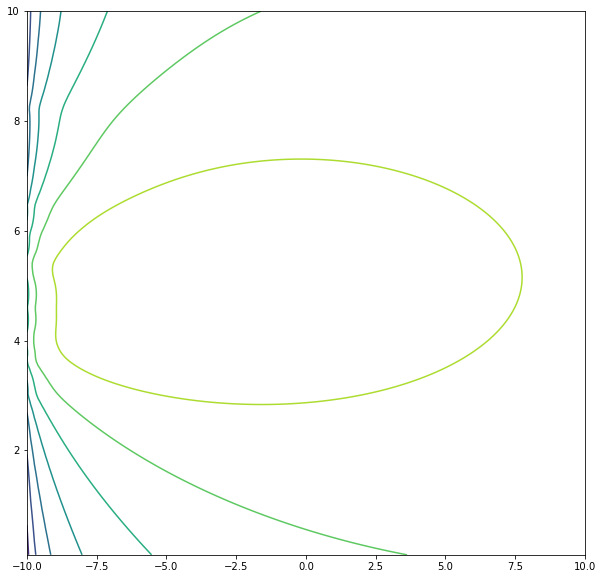

In [117]:
# Given gamma=2 and miu=0 for cauchy, set coordinates


neg_LL = NLL(x, m_vals, gamma_vals[:,np.newaxis])

max_LL = neg_LL.max()
g_max, mu_max = np.where(neg_LL >= max_LL)

gamma = gamma_vals[g_max]
mu = m_vals[mu_max]

print(gamma)
print(mu)

# Plot
fig = plt.figure(figsize=(10,10))
g, u = np.meshgrid(gamma_vals, m_vals)

plt.contour(u,g, neg_LL)

# Task 3 Maximum Likelihood vs Chi2 method (3 points)
There are two free parameters of Lorentz distribution, i.e. mass 𝑚 and width Γ. Fix the Γ value
to the best estimate from Task 2 to perform studies below.
1. Plot −2 ln(𝐿/𝐿𝑚𝑎𝑥) as a function of mass in 1D. Choose appropriate mass range so that
−2 ln(𝐿/𝐿𝑚𝑎𝑥) is around 5.
2. Construct binned Chi2 function 𝜒2 based on the histogram with bin size 0.5 GeV betwen
range 0 and 20 GeV. Scan the mass parameter and find the minimum Chi2 𝜒2
𝑚𝑖𝑛. Plot
Δ𝜒2 = 𝜒2(𝑚) − 𝜒2
𝑚𝑖𝑛 as a function of mass.
3. Superpose −2 ln(𝐿/𝐿𝑚𝑎𝑥) in blue and 𝜒2 − 𝜒2
𝑚𝑖𝑛 in organge in one figure. Describe your
obersvation.
See example plot below for illustration purpose.


# Bonus (3 points)
Following tutorial of the iminuit package below to obtain the best estimate of Max-
imum Likelihood method. Check consistenteny with your solutions in Task 2.
https://iminuit.readthedocs.io/en/stable/notebooks/generic_least_squares.html
See example results below (Ignore the number. Just for illustration purpose).